# Loan-Application-Status-Prediction

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
df=pd.read_csv("C:\jan20\Loan_data_status_prediction.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


In [4]:
df.shape

(381, 13)

Dataset have 381 rows and 13 columns.

In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133,360.0,0.0,Semiurban,N


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    int64  
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 38.8+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,381.0,3579.845144,1419.813818,150.0,2600.0,3333.0,4288.0,9703.0
CoapplicantIncome,381.0,1277.275381,2340.818114,0.0,0.0,983.0,2016.0,33837.0
LoanAmount,381.0,104.986877,28.358464,9.0,90.0,110.0,127.0,150.0
Loan_Amount_Term,370.0,340.864865,68.549257,12.0,360.0,360.0,360.0,480.0
Credit_History,351.0,0.837607,0.369338,0.0,1.0,1.0,1.0,1.0


## Check null value.

In [8]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

## Check null %

In [9]:
round(df.isnull().sum()/df.shape[0])*100,2

(Loan_ID              0.0
 Gender               0.0
 Married              0.0
 Dependents           0.0
 Education            0.0
 Self_Employed        0.0
 ApplicantIncome      0.0
 CoapplicantIncome    0.0
 LoanAmount           0.0
 Loan_Amount_Term     0.0
 Credit_History       0.0
 Property_Area        0.0
 Loan_Status          0.0
 dtype: float64,
 2)

<Axes: >

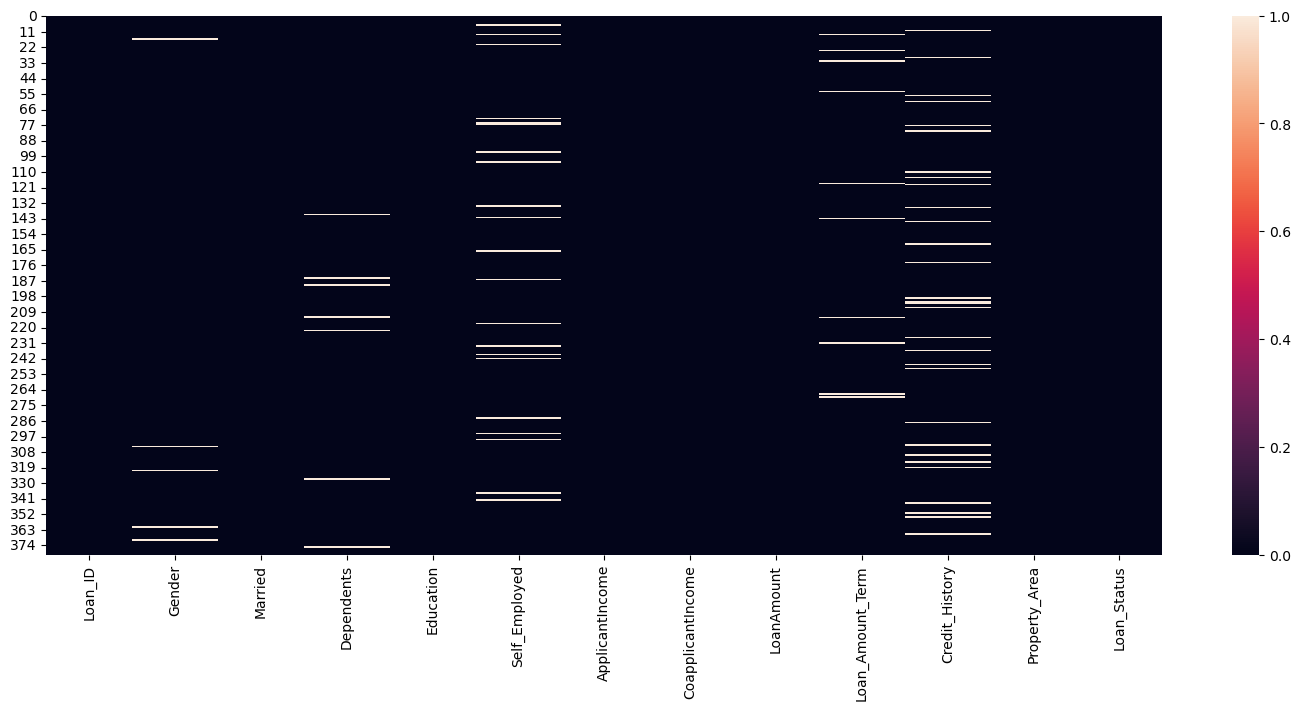

In [10]:
plt.figure(figsize=(18,7))
sns.heatmap(df.isnull())

In [11]:
for i in df.columns[1:]:
    print( i,'have unique values = ',df[i].unique(),'\n')

Gender have unique values =  ['Male' 'Female' nan] 

Married have unique values =  ['Yes' 'No'] 

Dependents have unique values =  ['1' '0' '2' '3+' nan] 

Education have unique values =  ['Graduate' 'Not Graduate'] 

Self_Employed have unique values =  ['No' 'Yes' nan] 

ApplicantIncome have unique values =  [4583 3000 2583 6000 2333 3200 2500 1853 1299 4950 3596 3510 4887 2600
 7660 3365 2799 4226 1442 3750 3167 4692 3500 1828 3667 3748 3600 1800
 2400 3941 4695 3410 5649 5821 2645 4000 1928 3086 4230 4616 2708 2132
 3366 3357 3029 4166 7100 4300 1875 4755 1000 3333 3846 3988 2366 2958
 3273 4133 3620 2484 1977 4188 1759 4288 3052 7333 2071 5316 2929 5050
 2214 2137 2957 3692 2014 2718 3459 4895 3316 4200 2698 2330 1538 4860
 6277 2281 3254 2980 1863 3089 9323 2439 2237 1820 3522 4344 3497 2045
 1916 4600 3625 2178 2383 4885 3858 4191 1907 3416 3917 4408 3244 3975
 2479 3418 3430 5703 3173 3850  150 3727 5000 4283 2221 4009 2971 6250
 4735 2491 3716 3189 3155 3463 3812 3315 5819 2510

In [12]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## EDA

## Univarient Analysis

In [13]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [14]:
df.replace({'Gender':{'N':0,'Y':1}},inplace=True)

<Axes: xlabel='Gender', ylabel='count'>

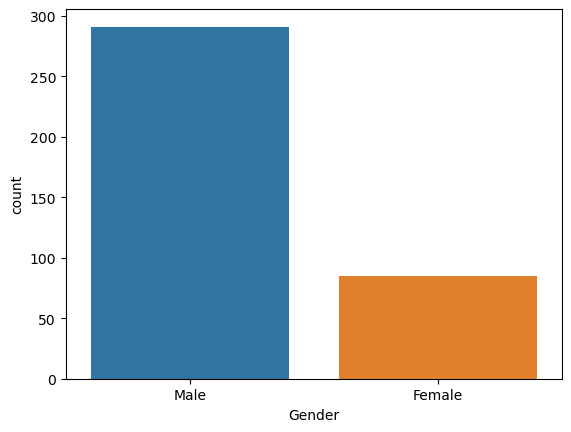

In [15]:
sns.countplot(x='Gender',data=df)

In [16]:
df['Gender'].value_counts()

Gender
Male      291
Female     85
Name: count, dtype: int64

In [17]:
df['Gender'].value_counts(normalize=True,dropna=False)

Gender
Male      0.763780
Female    0.223097
NaN       0.013123
Name: proportion, dtype: float64

In [18]:
# approx 76% are male applicant
# approx 22.5% are female applicant
# 1.5% are null values

In [19]:
df['Married'].unique()

array(['Yes', 'No'], dtype=object)

<Axes: xlabel='Married', ylabel='count'>

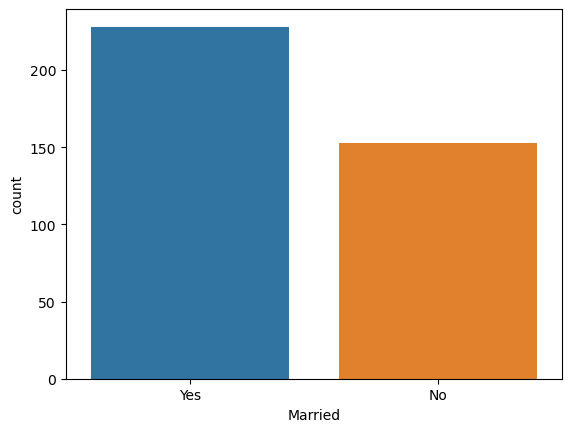

In [20]:
sns.countplot(x='Married',data=df)

In [21]:
df['Married'].value_counts(normalize=True,dropna=False)

Married
Yes    0.598425
No     0.401575
Name: proportion, dtype: float64

In [22]:
# approx 60% are married
# approx 40% are unmarried


<Axes: xlabel='Gender', ylabel='count'>

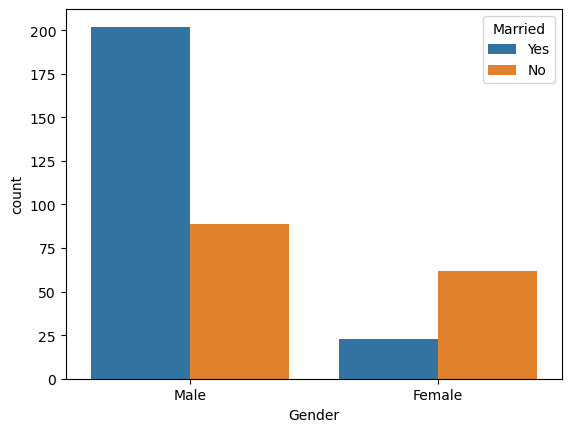

In [23]:
sns.countplot(x='Gender',hue='Married',data=df)

In [24]:
# who asked for Loan?
# Mostly married male  and non-married female.

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


In [26]:
df['Dependents'].unique()

array(['1', '0', '2', '3+', nan], dtype=object)

<Axes: xlabel='Dependents', ylabel='count'>

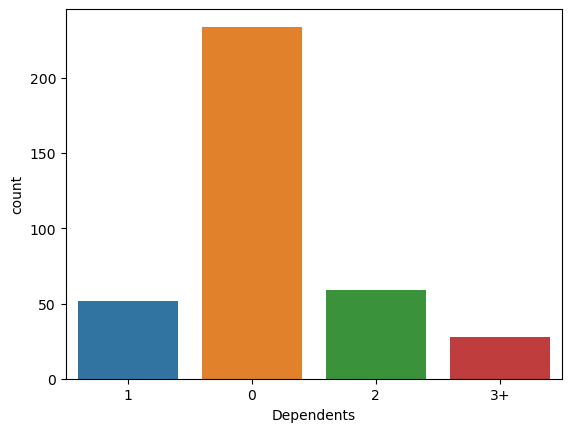

In [27]:
sns.countplot(x='Dependents',data=df)

Majority applicant have 0 dependents

<Axes: xlabel='Dependents', ylabel='count'>

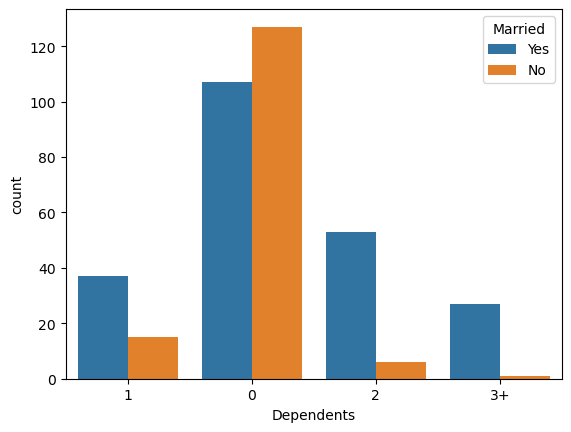

In [28]:
sns.countplot(x='Dependents',hue='Married',data=df)

 Unmarried have more dependents

In [29]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [30]:
df['Education'].value_counts(normalize=True)

Education
Graduate        0.729659
Not Graduate    0.270341
Name: proportion, dtype: float64

In [31]:
# approx 73% are Graduate
# approx 27% are not Graduate


<Axes: xlabel='Education', ylabel='count'>

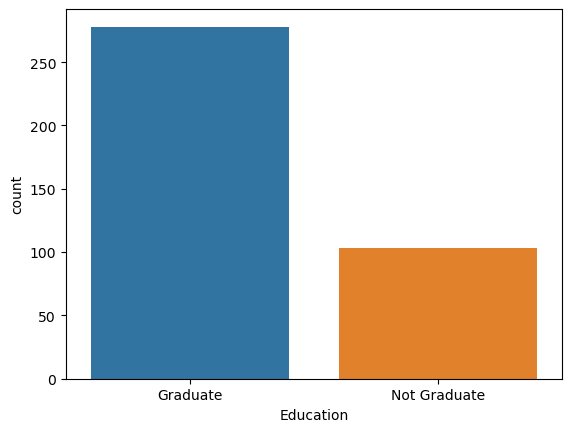

In [32]:
sns.countplot(x='Education',data=df)

In [33]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [34]:
df['Self_Employed'].value_counts(normalize=True)

Self_Employed
No     0.902778
Yes    0.097222
Name: proportion, dtype: float64

<Axes: xlabel='Self_Employed', ylabel='count'>

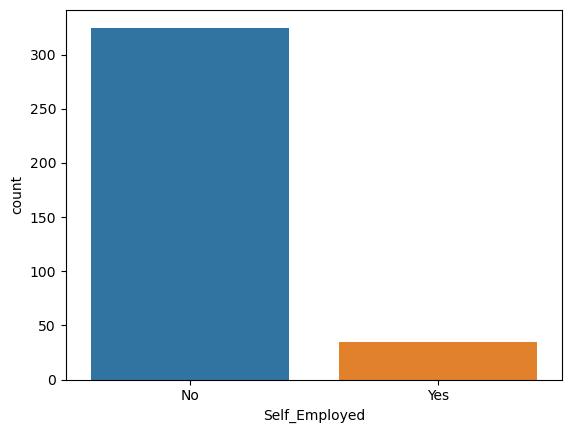

In [35]:
sns.countplot(x='Self_Employed',data=df)

## ApplicantIncome

In [36]:
df['ApplicantIncome'].nunique()

322

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

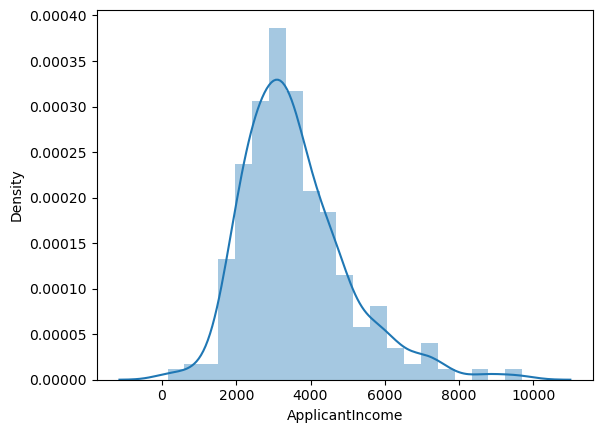

In [37]:
sns.distplot(df['ApplicantIncome'])

In [38]:
df['ApplicantIncome'].describe().T

count     381.000000
mean     3579.845144
std      1419.813818
min       150.000000
25%      2600.000000
50%      3333.000000
75%      4288.000000
max      9703.000000
Name: ApplicantIncome, dtype: float64

## CoapplicantIncome

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

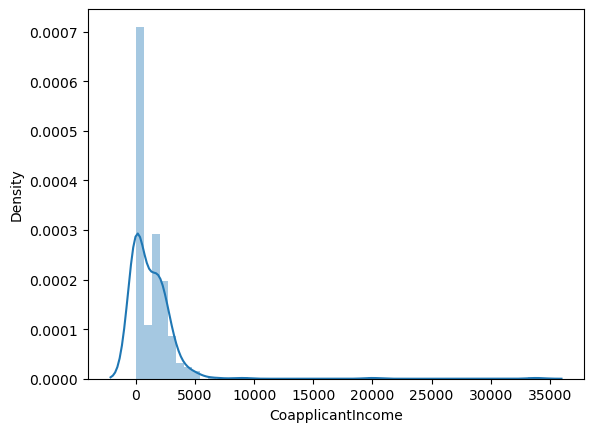

In [39]:
sns.distplot(df['CoapplicantIncome'])

## LoanAmount

<Axes: xlabel='LoanAmount', ylabel='Density'>

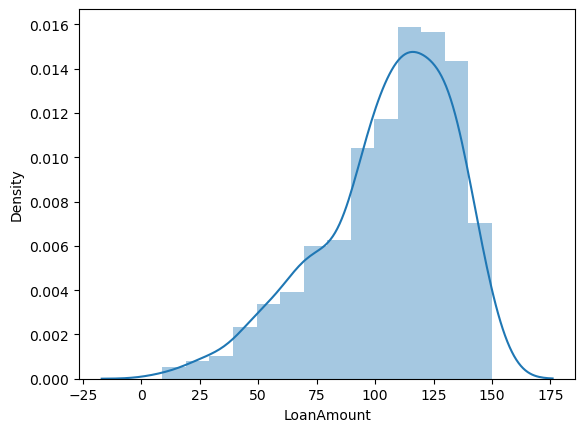

In [40]:
sns.distplot(df['LoanAmount'])

Distribution look like normal distbuted but left skewed

## Loan_Amount_Term

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

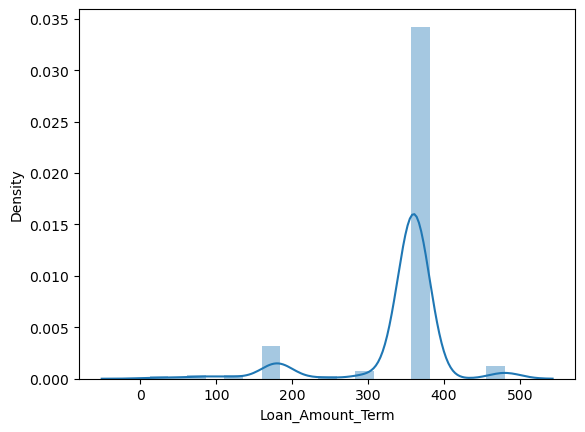

In [41]:
sns.distplot(df['Loan_Amount_Term'])

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

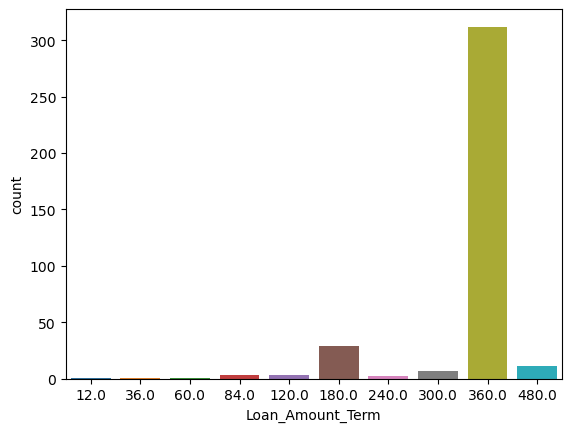

In [42]:
sns.countplot(x='Loan_Amount_Term',data=df)

In [43]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  84.,  12.,  36.])

In [44]:
df['Loan_Amount_Term'].value_counts(normalize=True,dropna=False)

Loan_Amount_Term
360.0    0.818898
180.0    0.076115
NaN      0.028871
480.0    0.028871
300.0    0.018373
120.0    0.007874
84.0     0.007874
240.0    0.005249
60.0     0.002625
12.0     0.002625
36.0     0.002625
Name: proportion, dtype: float64

## Credit_History

<Axes: xlabel='Credit_History', ylabel='count'>

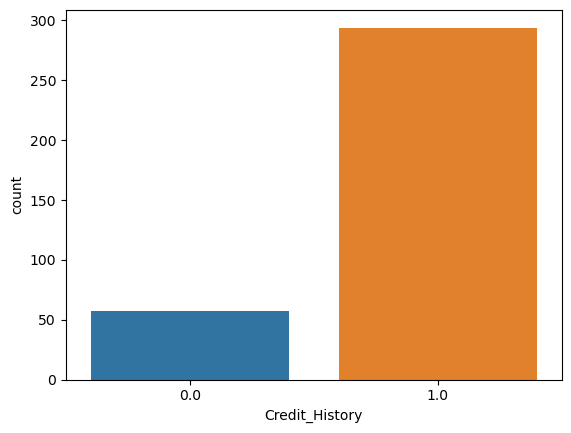

In [45]:
sns.countplot(data=df,x='Credit_History')

In [46]:
df['Credit_History'].value_counts(normalize=True,dropna=False)

Credit_History
1.0    0.771654
0.0    0.149606
NaN    0.078740
Name: proportion, dtype: float64

## Property_Area

In [47]:
df['Property_Area'].value_counts(normalize=True,dropna=False)

Property_Area
Semiurban    0.391076
Urban        0.330709
Rural        0.278215
Name: proportion, dtype: float64

<Axes: xlabel='Property_Area', ylabel='count'>

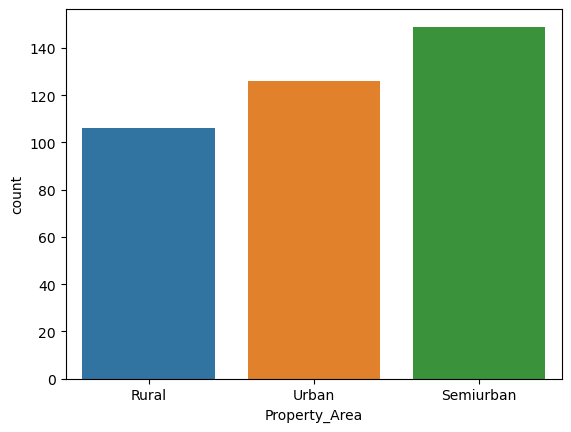

In [48]:
sns.countplot(data=df,x='Property_Area')

## Bivarient Exploratory data Analysis

### Gender VS Loan

In [49]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y


In [50]:
 #Loan_ID is not required. This donot provide any information to predict whether the Loan will be granted or Not, We can drop this.
df.drop(['Loan_ID'],axis=1)   

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703,0.0,128,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71,360.0,1.0,Rural,Y
379,Male,Yes,3+,Graduate,No,4106,0.0,40,180.0,1.0,Rural,Y


## Gender VS Loan_Status

<Axes: xlabel='Gender', ylabel='count'>

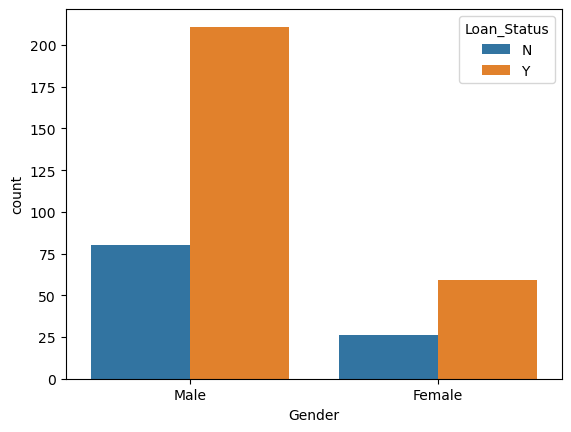

In [51]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)

In [52]:
df.groupby('Gender')['Loan_Status'].value_counts(normalize=True,dropna=False)

Gender  Loan_Status
Female  Y              0.694118
        N              0.305882
Male    Y              0.725086
        N              0.274914
Name: proportion, dtype: float64

## Married VS Loan_Status

<Axes: xlabel='Married', ylabel='count'>

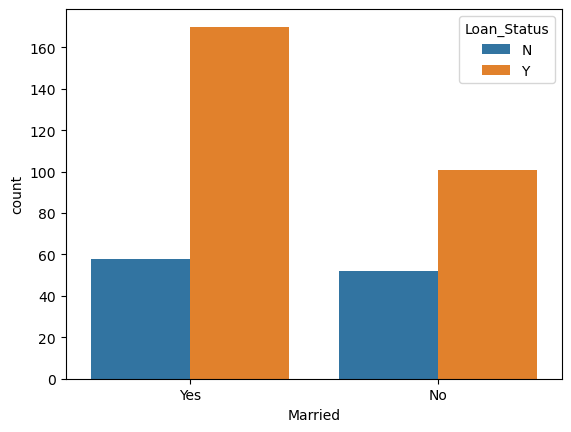

In [53]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

In [54]:
df['Married'].value_counts(normalize=True,dropna=False)

Married
Yes    0.598425
No     0.401575
Name: proportion, dtype: float64

In [55]:
df.groupby('Married')['Loan_Status'].value_counts(normalize=True,dropna=False)

Married  Loan_Status
No       Y              0.660131
         N              0.339869
Yes      Y              0.745614
         N              0.254386
Name: proportion, dtype: float64

## Dependents VS Loan_Status

<Axes: xlabel='Dependents', ylabel='count'>

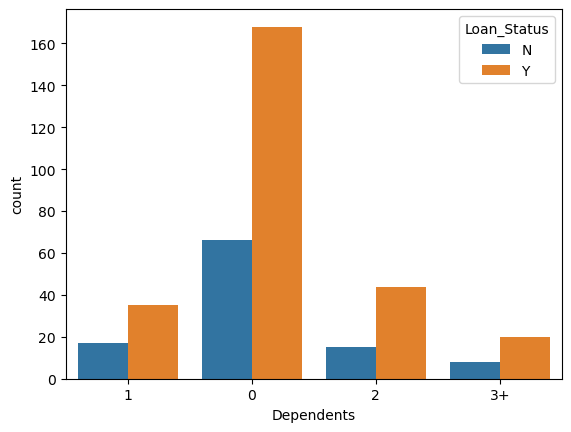

In [56]:
sns.countplot(x="Dependents",hue="Loan_Status",data=df)

Majority of the population have 0 dependent and are accepted for loan

## Education VS Loan_Status

<Axes: xlabel='Education', ylabel='count'>

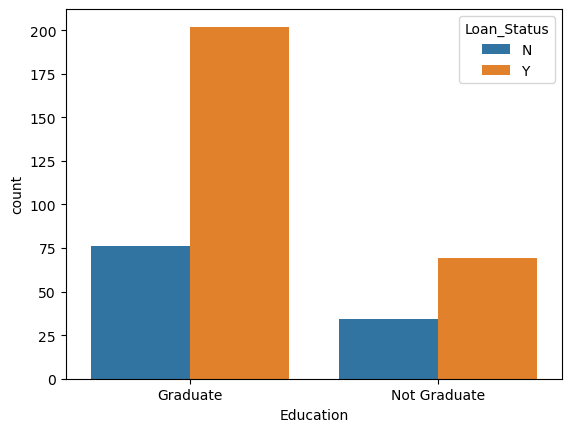

In [57]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

In [58]:
df['Education'].value_counts(normalize=True,dropna=False)

Education
Graduate        0.729659
Not Graduate    0.270341
Name: proportion, dtype: float64

In [59]:
df.groupby('Education')['Loan_Status'].value_counts(normalize=True,dropna=False)

Education     Loan_Status
Graduate      Y              0.726619
              N              0.273381
Not Graduate  Y              0.669903
              N              0.330097
Name: proportion, dtype: float64

## Self_Employed VS Loan_Status

<Axes: xlabel='Self_Employed', ylabel='count'>

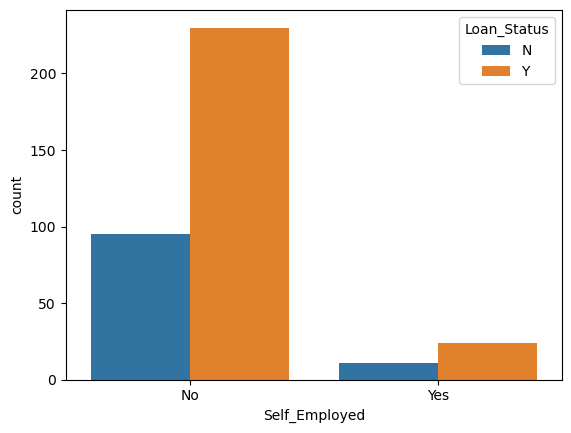

In [60]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

In [61]:
df['Self_Employed'].value_counts(normalize=True,dropna=False)

Self_Employed
No     0.853018
Yes    0.091864
NaN    0.055118
Name: proportion, dtype: float64

In [62]:
df.groupby('Self_Employed')['Loan_Status'].value_counts(normalize=True,dropna=False)

Self_Employed  Loan_Status
No             Y              0.707692
               N              0.292308
Yes            Y              0.685714
               N              0.314286
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

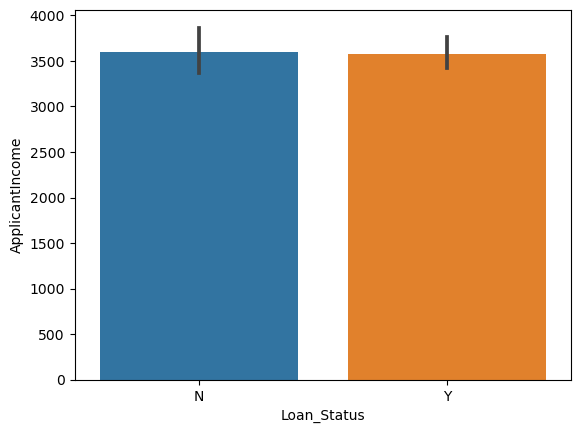

In [63]:
# Loan_Status VS ApplicantIncome By barplot
sns.barplot(x='Loan_Status',y='ApplicantIncome',data=df)

<Axes: xlabel='ApplicantIncome', ylabel='Loan_Status'>

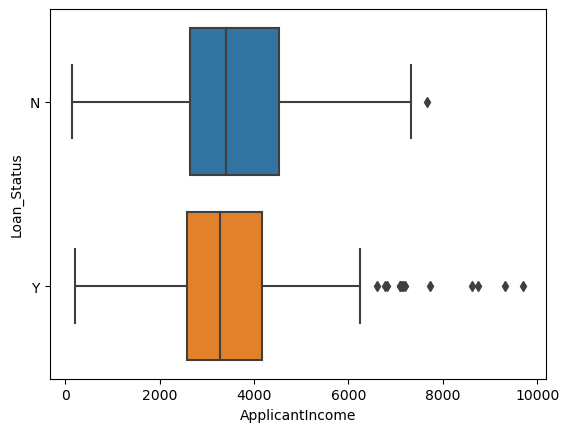

In [64]:
sns.boxplot(x=df['ApplicantIncome'],y=df['Loan_Status'],orient='h')

## CoapplicantIncom VS Loan_Status

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

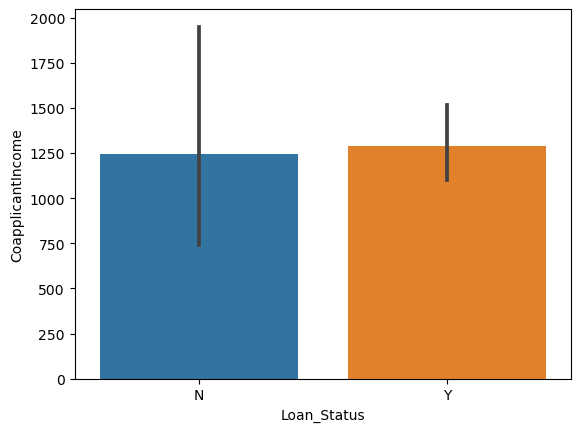

In [65]:
sns.barplot(x='Loan_Status',y='CoapplicantIncome',data=df)

## LoanAmount VS Loan_Status

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

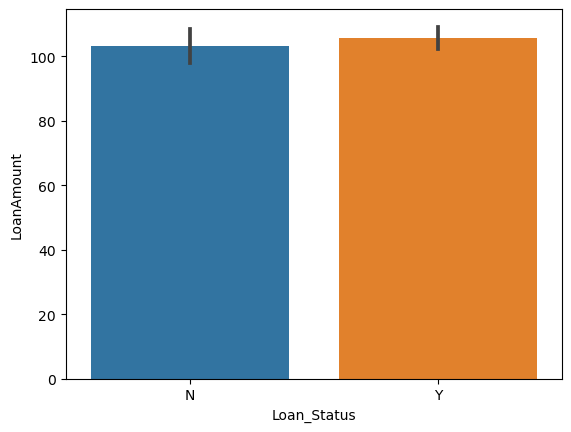

In [66]:
sns.barplot(y='LoanAmount',x='Loan_Status',data=df)

Nothing significant information is available

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

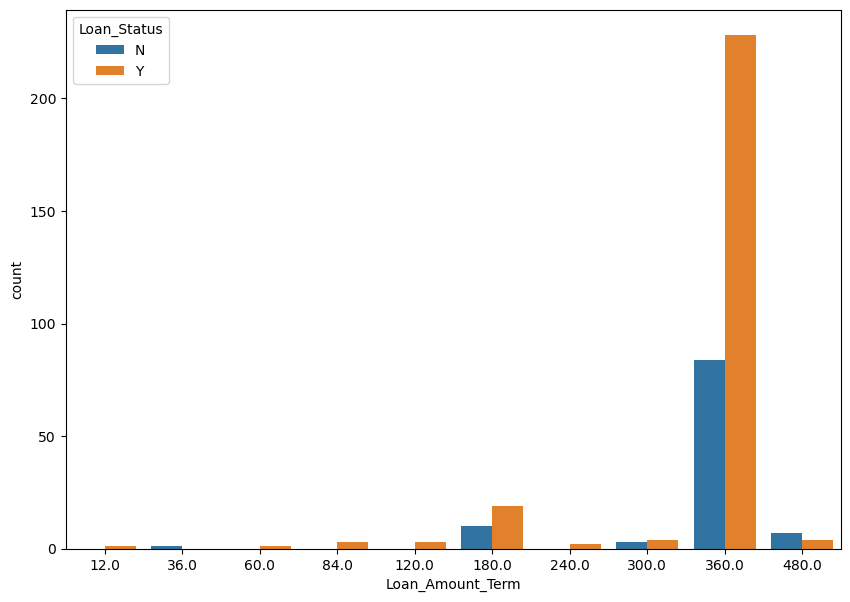

In [67]:
plt.figure(figsize=(10,7))
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

 Majority loan was asked for 30yr, Mostly was approved.
 
 If loas was asked for 40 years, chances are high for rejection

## Credit_History VS Loan_Status

<Axes: xlabel='Credit_History', ylabel='count'>

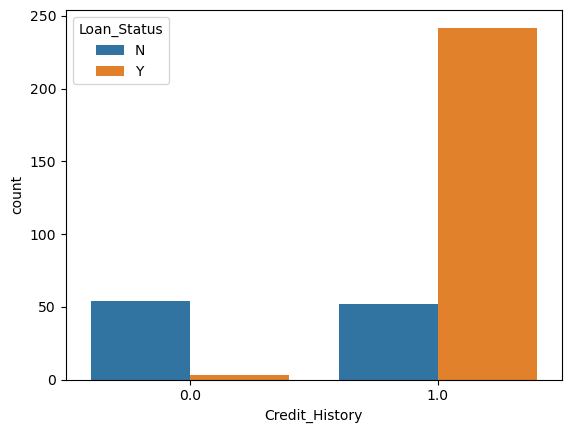

In [68]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

## If Credit history is available, Chances your Loan will approve.

In [69]:
df.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True,dropna=False)

Credit_History  Loan_Status
0.0             N              0.947368
                Y              0.052632
1.0             Y              0.823129
                N              0.176871
Name: proportion, dtype: float64

## Property_Area VS Loan_Status

<Axes: xlabel='Property_Area', ylabel='count'>

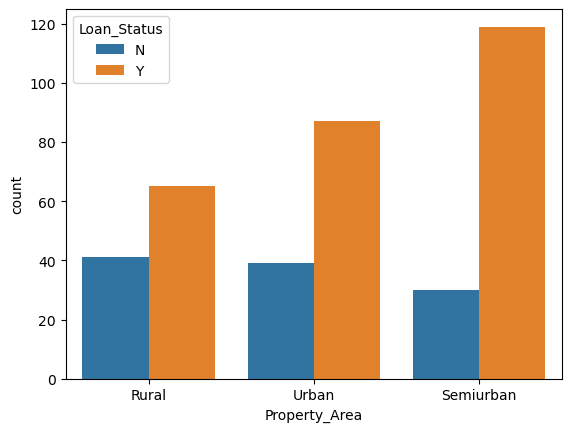

In [70]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

More applicants are likely from Semiurban area granted loans

## Convert Target Variable into Interegt

In [71]:
df['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [72]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [73]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,1


### Loan Granted = 1, Loan not Granted = 0

## Multivarient EDA

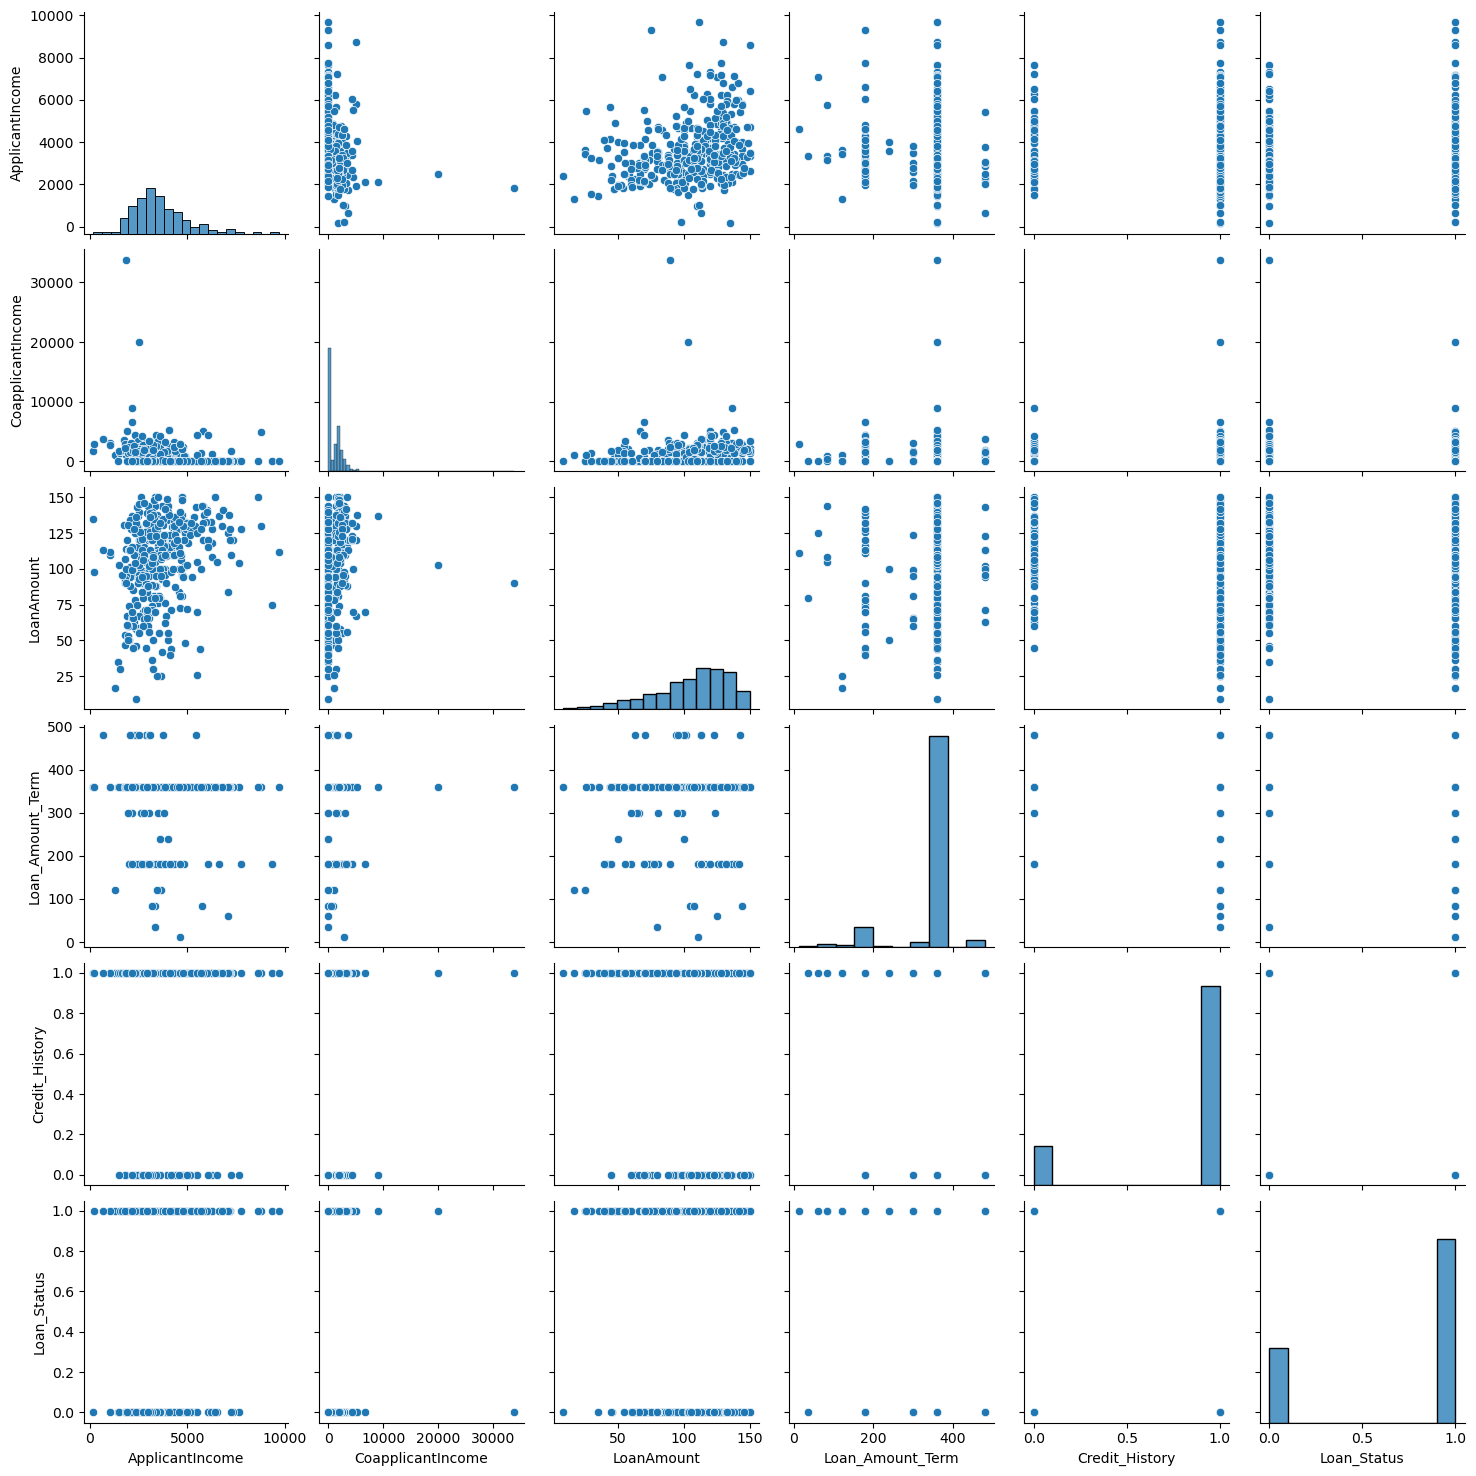

In [74]:
sns.pairplot(df)

LoanAmount have positive correlation with ApplicantIncome

In [75]:
df.corr(numeric_only=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.248693,0.270681,-0.109875,0.004535,-0.010167
CoapplicantIncome,-0.248693,1.000000,0.114936,0.001906,0.023015,0.009017
LoanAmount,0.270681,0.114936,1.000000,0.123579,-0.047899,0.041220
Loan_Amount_Term,-0.109875,0.001906,0.123579,1.000000,-0.013452,-0.047744
Credit_History,0.004535,0.023015,-0.047899,-0.013452,1.000000,0.618937
Loan_Status,-0.010167,0.009017,0.041220,-0.047744,0.618937,1.000000


<Axes: >

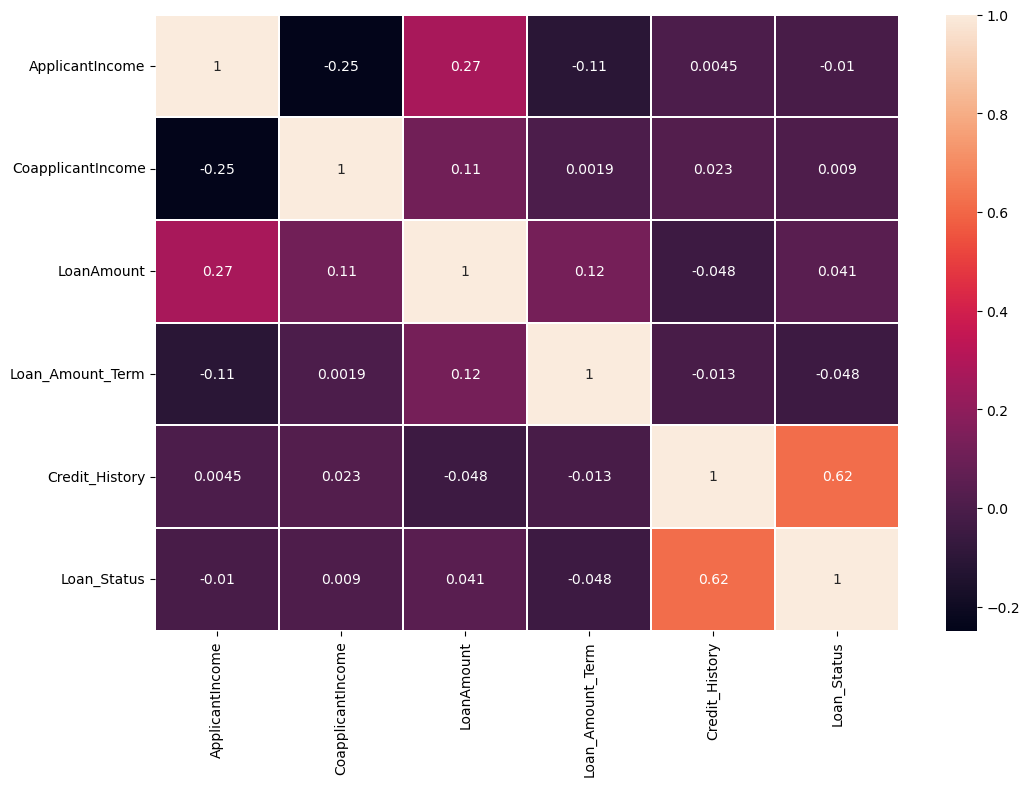

In [76]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,linecolor='white',linewidths=.25)

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

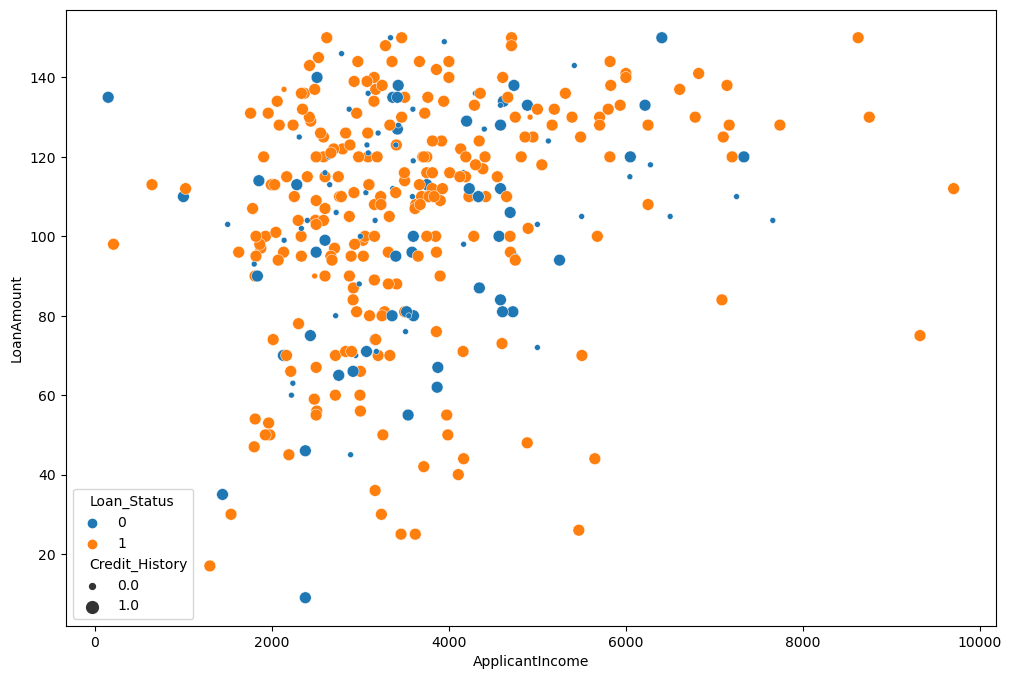

In [77]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',hue='Loan_Status',size='Credit_History',data=df)

 Some outliers are present in ApplicantIncome

<Axes: xlabel='CoapplicantIncome', ylabel='LoanAmount'>

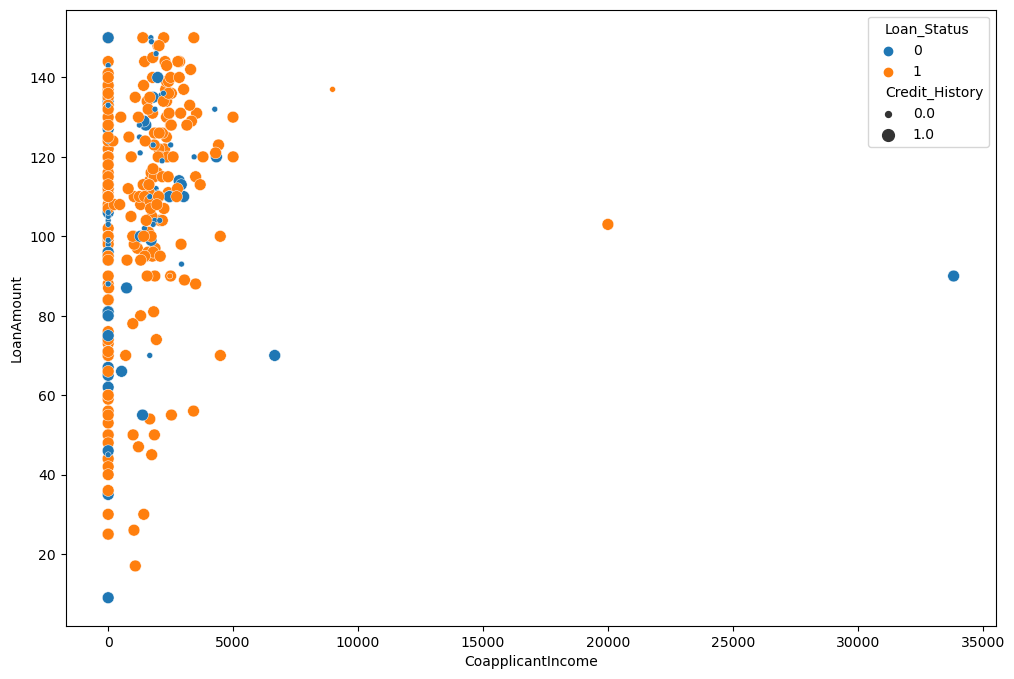

In [78]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='CoapplicantIncome',y='LoanAmount',hue='Loan_Status',size='Credit_History',data=df)

Even coapplicant income is 0, Loan has been granted

In [79]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,1


## Missing Values

In [80]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [81]:
num=df.select_dtypes(np.number)
num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,4583,1508.0,128,360.0,1.0,0
1,3000,0.0,66,360.0,1.0,1
2,2583,2358.0,120,360.0,1.0,1
3,6000,0.0,141,360.0,1.0,1
4,2333,1516.0,95,360.0,1.0,1
...,...,...,...,...,...,...
376,5703,0.0,128,360.0,1.0,1
377,3232,1950.0,108,360.0,1.0,1
378,2900,0.0,71,360.0,1.0,1
379,4106,0.0,40,180.0,1.0,1


In [82]:
cat=df.select_dtypes('O')
cat

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001003,Male,Yes,1,Graduate,No,Rural
1,LP001005,Male,Yes,0,Graduate,Yes,Urban
2,LP001006,Male,Yes,0,Not Graduate,No,Urban
3,LP001008,Male,No,0,Graduate,No,Urban
4,LP001013,Male,Yes,0,Not Graduate,No,Urban
...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,Urban
377,LP002974,Male,Yes,0,Graduate,No,Rural
378,LP002978,Female,No,0,Graduate,No,Rural
379,LP002979,Male,Yes,3+,Graduate,No,Rural


In [83]:
num.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Loan_Status           0
dtype: int64

In [84]:
df['LoanAmount'].value_counts()

LoanAmount
120    19
110    16
100    15
128    11
113    11
       ..
59      1
63      1
101     1
48      1
40      1
Name: count, Length: 101, dtype: int64

In [85]:
df['LoanAmount'].median()

110.0

In [86]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    312
180.0     29
480.0     11
300.0      7
120.0      3
84.0       3
240.0      2
60.0       1
12.0       1
36.0       1
Name: count, dtype: int64

In [87]:
df['Loan_Amount_Term'].mode()

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [88]:
df['Credit_History'].value_counts()

Credit_History
1.0    294
0.0     57
Name: count, dtype: int64

In [89]:
cat.isnull().sum()

Loan_ID           0
Gender            5
Married           0
Dependents        8
Education         0
Self_Employed    21
Property_Area     0
dtype: int64

In [91]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)


In [92]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [93]:
df['Loan_Amount_Term'].dtypes

dtype('float64')

In [95]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [97]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [98]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

In [99]:
df.drop("Loan_ID",axis=1,inplace=True)

In [100]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

In [101]:
df['Dependents'].replace('3+',3,inplace=True)

In [103]:
df['Dependents']=df['Dependents'].astype(int)

In [104]:
df.dtypes

Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

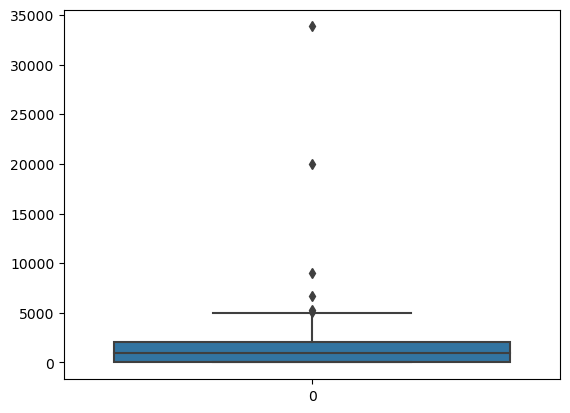

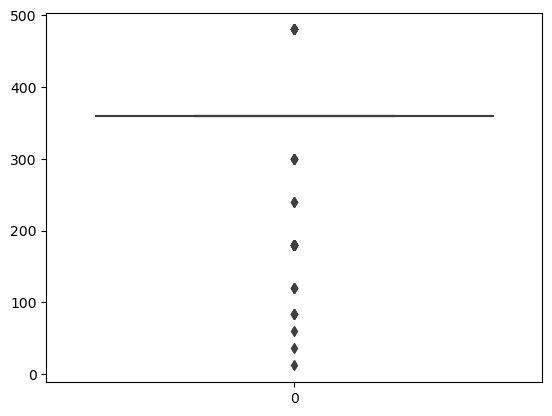

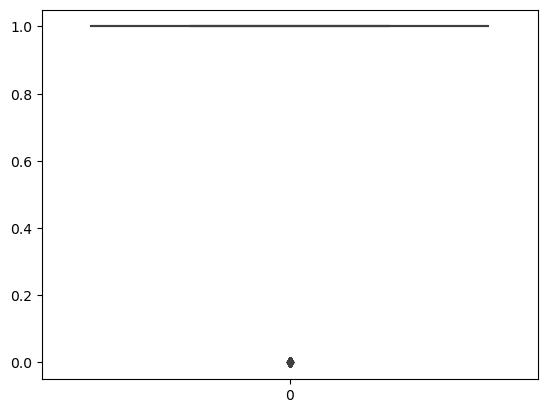

In [110]:
for i in df.columns:
    if df[i].dtypes==np.number:
        sns.boxplot(df[i])
        plt.show()

In [111]:
df['TotalIncome']=df['ApplicantIncome']+ df['CoapplicantIncome']

<Axes: xlabel='TotalIncome', ylabel='Density'>

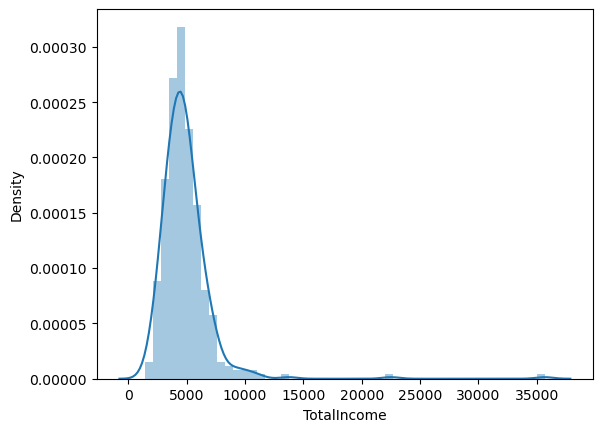

In [113]:
sns.distplot(df['TotalIncome'])

In [114]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0,6091.0
1,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1,3000.0
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1,4941.0
3,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1,6000.0
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,1,3849.0


In [115]:
df.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [117]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,Yes,1,Graduate,No,128,360.0,1.0,Rural,0,6091.0
1,Male,Yes,0,Graduate,Yes,66,360.0,1.0,Urban,1,3000.0


In [118]:

df.dtypes

Gender               object
Married              object
Dependents            int32
Education            object
Self_Employed        object
LoanAmount            int64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status           int32
TotalIncome         float64
dtype: object

<Axes: >

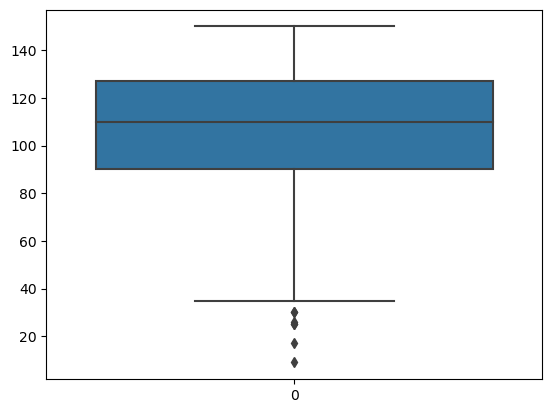

In [119]:
sns.boxplot(df['LoanAmount'])

<Axes: >

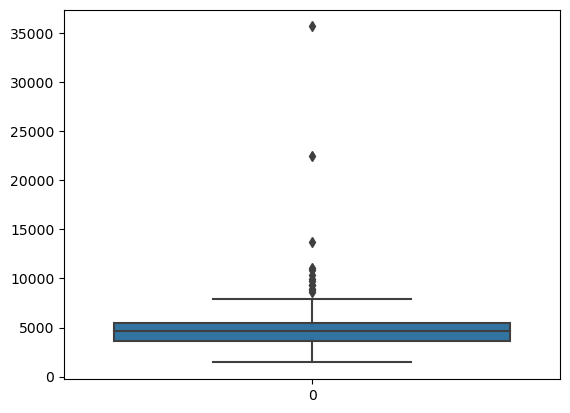

In [120]:
sns.boxplot(df['TotalIncome'])

In [121]:
IQR=df['LoanAmount'].quantile(.75)-df['LoanAmount'].quantile(.25)
IQR

37.0

In [122]:
upper=df['LoanAmount'].quantile(.75)+(1.5*IQR)
upper

182.5

In [123]:
df['LoanAmount']=np.where(df['LoanAmount']>upper,upper,df['LoanAmount'])

<Axes: >

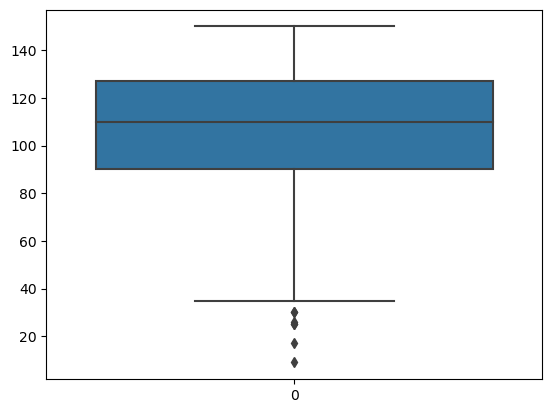

In [124]:
sns.boxplot(df['LoanAmount'])

<Axes: xlabel='LoanAmount', ylabel='Density'>

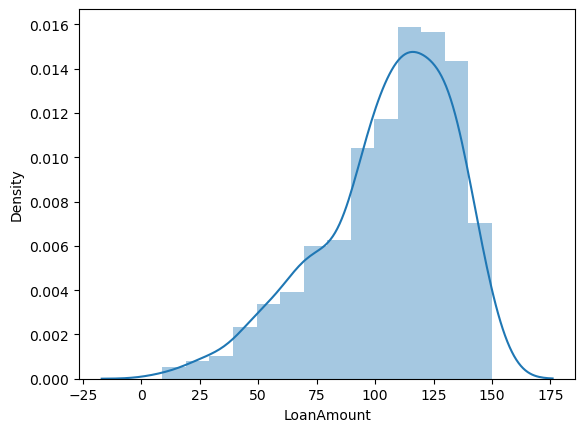

In [125]:
sns.distplot(df['LoanAmount'])

In [126]:
IQR=df['TotalIncome'].quantile(.75)-df['TotalIncome'].quantile(.25)
IQR

1836.0

In [127]:
upper=df['TotalIncome'].quantile(.75)+(1.5*IQR)
upper

8254.0

In [128]:

df['TotalIncome']=np.where(df['TotalIncome']>upper,upper,df['TotalIncome'])

<Axes: >

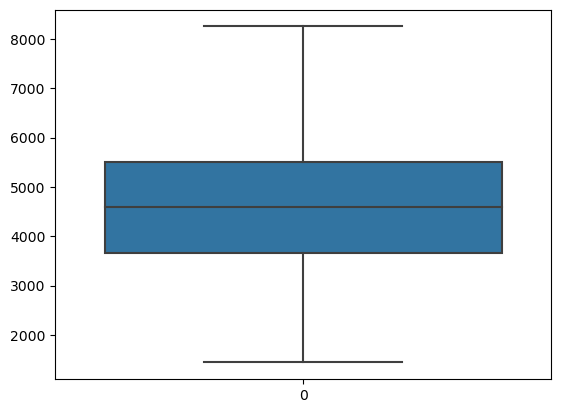

In [129]:
sns.boxplot(df['TotalIncome'])

In [130]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,0,6091.0
1,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,1,3000.0
2,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,1,4941.0
3,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,1,6000.0
4,Male,Yes,0,Not Graduate,No,95.0,360.0,1.0,Urban,1,3849.0


In [131]:
df.dtypes

Gender               object
Married              object
Dependents            int32
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status           int32
TotalIncome         float64
dtype: object

In [132]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [133]:
x.shape,y.shape

((381, 10), (381,))

In [134]:
x=pd.get_dummies(x,drop_first=True)

In [135]:
x.shape

(381, 11)

In [136]:
y.value_counts()

Loan_Status
1    271
0    110
Name: count, dtype: int64

## Dataset Balancing

In [138]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [139]:
x,y=sm.fit_resample(x,y)

In [140]:
x.shape,y.shape

((542, 11), (542,))

## Transformation

In [141]:
x.skew()

Dependents                 1.380628
LoanAmount                -0.785769
Loan_Amount_Term          -2.096425
Credit_History            -1.220871
TotalIncome                0.505310
Gender_Male               -1.712898
Married_Yes               -0.577603
Education_Not Graduate     0.796250
Self_Employed_Yes          2.373564
Property_Area_Semiurban    0.376492
Property_Area_Urban        0.392116
dtype: float64

In [142]:
from sklearn.preprocessing import power_transform
transformed=power_transform(x)

### Scaled

In [143]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [144]:
scaled=sc.fit_transform(transformed)

In [145]:
x=scaled

## Machine Learning

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [147]:
# Find best random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
        
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)        

Best accuracy is  0.8807339449541285 on Random State = 36


In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=36,test_size=.20)

In [152]:
!pip install xgboost

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [155]:
LR_model=LogisticRegression()
RD_model=RidgeClassifier()
DT_model=DecisionTreeClassifier()
SV_model=SVC()
KNR_model=KNeighborsClassifier()
RFR_model=RandomForestClassifier()
XGB_model=XGBClassifier()
SGH_model=SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model=GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model]

In [156]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy_Score of ',m,'is',accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,'is \n',confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 88.07339449541286
Confusion Matrix of  LogisticRegression() is 
 [[41 10]
 [ 3 55]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        51
           1       0.85      0.95      0.89        58

    accuracy                           0.88       109
   macro avg       0.89      0.88      0.88       109
weighted avg       0.89      0.88      0.88       109

**************************************************
Accuracy_Score of  RidgeClassifier() is 84.40366972477065
Confusion Matrix of  RidgeClassifier() is 
 [[34 17]
 [ 0 58]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        51
           1       0.77      1.00      0.87        58

    accuracy                           0.84       109
   macro avg       0.89      0.83      0.84       109
weighted avg       0.88      0.84      0.84       109

***********************************************

## Cross Validation

In [157]:
from sklearn.model_selection import cross_val_score

In [159]:
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 88.07339449541286
cross Validation accuracy score of  LogisticRegression()  is  79.91505266734625
**************************************************
Accuracy_Score of  RidgeClassifier() is 84.40366972477065
cross Validation accuracy score of  RidgeClassifier()  is  79.5429833503228
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 80.73394495412845
cross Validation accuracy score of  DecisionTreeClassifier()  is  81.93170234454638
**************************************************
Accuracy_Score of  SVC() is 85.3211009174312
cross Validation accuracy score of  SVC()  is  77.88141352361536
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 84.40366972477065
cross Validation accuracy score of  KNeighborsClassifier()  is  78.05980292218825
**************************************************
Accuracy_Score of  RandomForestClassifier() is 88.07339449541286
c

#### Let's try hypertune this algo

In [160]:
from sklearn.model_selection import GridSearchCV

In [167]:
params={"learning_rate"  : [0.01,.05,.1,.2,.3,.5],
        "n_estimators"   : [5,50,100,200,300,400],
        "max_dept"       : [3,4,5,6,8],
    }

In [168]:
GCV=GridSearchCV(GB_model,params,cv=5,scoring='accuracy',n_jobs=-1)
GCV.fit(x_train,y_train)

ValueError: Invalid parameter 'max_dept' for estimator GradientBoostingClassifier(learning_rate=0.01). Valid parameters are: ['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'].

In [ ]:
GCV.best_estimator_

In [ ]:
GCV.best_params_

In [ ]:
pred=GCV.best_estimator_.predict(x_test)

In [ ]:
accuracy_score(y_test,pred)

In [ ]:
print('Accuracy score:', round(accuracy_score(y_test,pred) * 100, 2))
print('F1 score:', round(f1_score(y_test,pred) * 100, 2))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)
sns.heatmap(confusion_matrix(y_test,pred),annot=True, fmt='d')

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

In [ ]:
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC AUC Plot')
plt.show()

## Saving the Model

In [ ]:
import joblib
joblib.dump(GCV.best_estimator_,"Loan_Application.pkl")